# Lasso-Highlight
The lasso-highlight delineates a substructure of a molecule.

## Installation in Conda
If not already installed, install **pip** and **git**:  
```
conda install git
conda install pip
```
Then install via pip:
```
pip install git+git://github.com/c-feldmann/lassohighlight
```
## Code Examples
### Loading Packages

In [1]:
# Default packages
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from PIL import Image
import io

In [2]:
# Functions of this package
from lassohighlight.lassohighlight import draw_substructurematch
from lassohighlight.lassohighlight import draw_multi_matches

### Setting up an Example
Defining colors as RGBA

In [3]:
color_dict = {"gray":   (0.5, 0.5,  0.5,  1), 
              "pink":   (1,   0,    0.5,  1),
              "blue":   (0,   0.5,  1,    1), 
              "orange": (1,   0.5,  0,    1),
              "salmon": (1,   0.75, 0.75, 1)}

In [4]:
# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
# List of exemplpary substructures
smarts_list = ['CONN', 'N#CC~CO', 'C=CON', 'CONNCN']

Creating and preparing the molecule:

In [5]:
mol = Chem.MolFromSmiles(smi)
mol = Draw.PrepareMolForDrawing(mol)

Defining highlighted atoms:

In [6]:
atom_idx_list = []
for smart_str in smarts_list:
    smart_obj = Chem.MolFromSmarts(smart_str)
    matched_atoms = set.union(*[set(x) for x in mol.GetSubstructMatches(smart_obj)])
    atom_idx_list.append(matched_atoms)

## Highlighting a single substructure

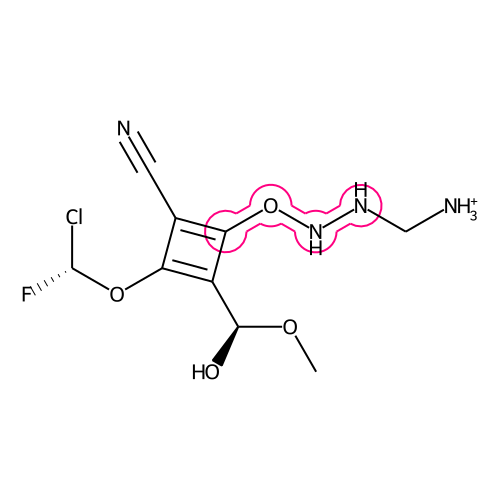

In [7]:
# Defining the canvas
d = rdMolDraw2D.MolDraw2DCairo(500, 500)

# Setting all atom colors to black. Only personal preference.
d.drawOptions().updateAtomPalette({i: (0, 0, 0, 0) for i in range(100)}) # Setting atom color to black

# Setting up the coordinate system by drawing and erasing molecule
d.DrawMolecule(mol)
d.ClearDrawing()

# adding the lasso highlighting
draw_substructurematch(d, mol, atom_idx_list[0], atom_radius=0.4, relative_bond_width=0.5, color=color_dict["pink"])

# adding the molecule
d.DrawMolecule(mol)
d.FinishDrawing()

# displaying the canvas
Image.open(io.BytesIO(d.GetDrawingText()))

### Relative bond width
The parameter `relative_bond_width` sets the width for the highlighting around the bonds. When set to 0.5 (pink) the width corresponds to half of the circles around the atoms. When set to 1.0 (blue) the width is equal to the radius of the circles. 

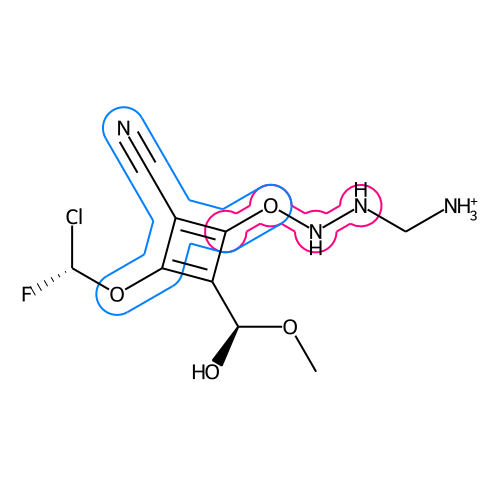

In [8]:
# Defining the canvas
d = rdMolDraw2D.MolDraw2DCairo(500, 500)

# Setting all atom colors to black. Only personal preference.
d.drawOptions().updateAtomPalette({i: (0, 0, 0, 0) for i in range(100)}) # Setting atom color to black

# Setting up the coordinate system by drawing and erasing molecule
d.DrawMolecule(mol)
d.ClearDrawing()

# adding the lasso highlighting with a relative_bond_width of 0.5
draw_substructurematch(d, mol, atom_idx_list[0], atom_radius=0.4, relative_bond_width=0.5, color=color_dict["pink"])

# adding the lasso highlighting with a relative_bond_width of 1.0
draw_substructurematch(d, mol, atom_idx_list[1], atom_radius=0.4, relative_bond_width=1, color=color_dict["blue"])

# adding the molecule
d.DrawMolecule(mol)
d.FinishDrawing()

# displaying the canvas
Image.open(io.BytesIO(d.GetDrawingText()))

## Highlighting a multiple substructures
It is also possible to highlight multiple substructures at once.

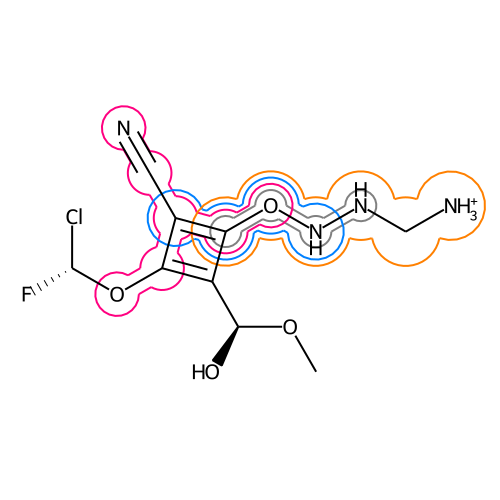

In [9]:
# Defining the canvas settings
d = rdMolDraw2D.MolDraw2DCairo(500, 500)
d.drawOptions().updateAtomPalette({i: (0, 0, 0, 0) for i in range(100)}) # Setting atom color to black

# Setting up the coordinate system by drawing and erasing molecule
d.DrawMolecule(mol)
d.ClearDrawing()

# adding the lasso highlighting for multiple matches
draw_multi_matches(d, mol, atom_idx_list, r_min=0.3, r_dist=0.12, relative_bond_width=0.5, color_list=color_dict.values(), line_width=2)

# adding the molecule
d.DrawMolecule(mol)
d.FinishDrawing()

# displaying the canvas
Image.open(io.BytesIO(d.GetDrawingText()))

## 